In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
cap = cv.VideoCapture('HW6.mp4')
width = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv.CAP_PROP_FPS))
codec = cv.VideoWriter_fourcc(*'XVID')
out = cv.VideoWriter('HW6_res.avi', codec, 20.0, (width, height))

True

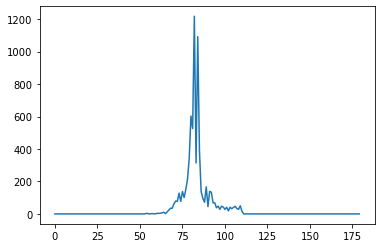

In [3]:
cap = cv.VideoCapture('HW6.mp4')
ret, frame = cap.read()

x, y, width, height = 500, 220, 250, 125
track_window = (x, y, width, height)

roi = frame[y:y+height, x:x+width]
hsv_roi = cv.cvtColor(roi, cv.COLOR_BGR2HSV)

#mask = cv.inRange(hsv_roi,l_b,u_b)
mask = cv.inRange(hsv_roi, np.array((0., 30., 0.)), np.array((255., 128., 110.)))
#print(mask.shape)

roi_hist = cv.calcHist([hsv_roi], [2], mask, [180], [0,180])
plt.plot(roi_hist)

cv.normalize(roi_hist, roi_hist, 0, 255, cv.NORM_MINMAX)

term_crit = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 1)
cv.imshow('roi', roi)
cv.imwrite('roi.png',roi)

In [4]:
while(1):
    ret, frame = cap.read()
    if ret == True:
        
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv], [2], roi_hist, [0,180], 1)
        
        ret, track_window = cv.CamShift(dst, track_window, term_crit)
        
        pts = cv.boxPoints(ret) #找出矩形4個頂點
        print(pts)
        pts = np.int0(pts)

        final_image = cv.polylines(frame, [pts], True, (130,130,200), 2) #非填充多邊形
        
        cv.imshow('dst', dst)
        cv.imshow('final_image', final_image)
        
        out.write(frame) #save color video
        k = cv.waitKey(30) & 0xFF
        if k==27:
            break
    
    else:
        break
cap.release()
cv.destroyAllWindows()

[[518.20886 295.13037]
 [664.80066 279.32135]
 [670.79114 334.86963]
 [524.19934 350.67865]]
[[511.45044 314.41452]
 [650.61975 296.05527]
 [657.54956 348.58548]
 [518.38025 366.94473]]
[[501.1621 327.9219]
 [639.3548 308.0471]
 [646.8379 360.0781]
 [508.6452 379.9529]]
[[501.54666 327.6225 ]
 [640.1019  308.128  ]
 [647.45337 360.3775 ]
 [508.89807 379.872  ]]
[[483.22995 343.15063]
 [621.0424  322.9997 ]
 [628.77    375.84937]
 [490.95758 396.0003 ]]
[[468.16922 357.3857 ]
 [604.79846 336.37686]
 [612.8308  388.6143 ]
 [476.20154 409.62314]]
[[454.05157 367.0124 ]
 [591.23114 346.7473 ]
 [598.9484  398.9876 ]
 [461.76886 419.2527 ]]
[[448.1018  370.93445]
 [586.5499  351.2865 ]
 [593.8982  403.06555]
 [455.45007 422.7135 ]]
[[438.25848 372.19043]
 [573.622   353.43256]
 [580.7415  404.80957]
 [445.378   423.56744]]
[[438.3456  372.51822]
 [573.4059  353.36588]
 [580.6544  404.48178]
 [445.59412 423.63412]]
[[427.1111  369.83698]
 [562.48816 350.1839 ]
 [569.8889  401.16302]
 [434.511